## Eigenvalue Decomposition

In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

data = pd.read_csv("data.csv",header=None) 
label = pd.read_csv("labels.csv",header=None)

data = pd.concat([data,label], axis=1, sort=False, ignore_index=True)
data_available = data.dropna()
data_without_label = data[~data.isin(data_available)].dropna(thresh=100)
data_without_label[186].replace(np.nan, 0, inplace=True)
X = data_available.drop(186, 1)
Y = data_available[186]

W = data_without_label.drop(186, 1)
Z = data_without_label[186]

In [2]:
X_std = StandardScaler().fit_transform(X)

In [3]:
X_std = stats.zscore(X_std)

##### Calculate Covariance Matrix

In [4]:
cov_mat= np.cov(X_std, rowvar=False)
pd.DataFrame(cov_mat)

,0,1,2,3,4,5,6,7,8,9,...,176,177,178,179,180,181,182,183,184,185
0,1.005618,0.232527,-0.933028,-0.165539,0.974581,-0.102561,0.719063,0.058889,-0.814161,0.260706,...,0.076403,0.305920,0.053062,-0.491215,0.343301,0.342971,-0.440488,-0.421680,0.212382,0.285261
1,0.232527,1.005618,-0.357787,-0.812232,0.307519,0.859004,0.379522,0.800600,-0.187571,-0.633085,...,0.332502,-0.211718,-0.262151,0.367724,0.159364,0.306839,-0.314586,-0.451113,0.037006,0.109957
2,-0.933028,-0.357787,1.005618,0.301627,-0.933676,0.005159,-0.840978,-0.197089,0.903849,-0.172578,...,-0.146191,-0.237379,0.015551,0.435648,-0.394920,-0.436822,0.527846,0.545263,-0.212347,-0.304260
3,-0.165539,-0.812232,0.301627,1.005618,-0.216243,-0.823297,-0.343266,-0.764177,0.127398,0.722281,...,-0.221864,0.160878,0.150695,-0.281625,-0.227582,-0.352285,0.363563,0.475937,-0.087959,-0.197019
4,0.974581,0.307519,-0.933676,-0.216243,1.005618,-0.005110,0.739652,0.129449,-0.805607,0.176590,...,0.118199,0.278107,0.005721,-0.477498,0.378401,0.386664,-0.476658,-0.453670,0.240742,0.302751
5,-0.102561,0.859004,0.005159,-0.823297,-0.005110,1.005618,0.082387,0.762173,0.133529,-0.757843,...,0.276176,-0.290808,-0.258255,0.509790,0.126790,0.223882,-0.225277,-0.299127,0.061271,0.123199
6,0.719063,0.379522,-0.840978,-0.343266,0.739652,0.082387,1.005618,0.323560,-0.846376,0.082487,...,0.142154,0.124661,-0.038093,-0.374070,0.444090,0.533708,-0.572419,-0.629361,0.215098,0.302466
7,0.058889,0.800600,-0.197089,-0.764177,0.129449,0.762173,0.323560,1.005618,-0.079623,-0.777997,...,0.451413,-0.141391,-0.416170,0.238718,0.272008,0.472664,-0.406921,-0.530042,0.052103,0.224870
8,-0.814161,-0.187571,0.903849,0.127398,-0.805607,0.133529,-0.846376,-0.079623,1.005618,-0.366709,...,-0.194868,-0.242038,0.096940,0.508903,-0.440658,-0.472176,0.554742,0.537282,-0.235602,-0.348390
9,0.260706,-0.633085,-0.172578,0.722281,0.176590,-0.757843,0.082487,-0.777997,-0.366709,1.005618,...,-0.196139,0.278896,0.216533,-0.436254,0.009994,-0.137140,0.071937,0.183964,0.071307,-0.001732


##### Calculate Eigenvalue and Eigenvector

In [5]:
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.07945921+0.j -0.11467873+0.j  0.03654182+0.j ... -0.02934195+0.j
  -0.01144165+0.j -0.06125162+0.j]
 [-0.0857876 +0.j -0.08736332+0.j  0.03174093+0.j ...  0.01074737+0.j
  -0.00722919+0.j -0.04060416+0.j]
 [-0.06874456+0.j  0.12689409+0.j -0.05399146+0.j ... -0.02531911+0.j
  -0.03618341+0.j -0.12149601+0.j]
 ...
 [ 0.00907257+0.j  0.10844222+0.j -0.1094474 +0.j ...  0.04748235+0.j
   0.00591848+0.j  0.14358559+0.j]
 [ 0.00886524+0.j -0.04109857+0.j  0.0922287 +0.j ...  0.0065382 +0.j
  -0.01725673+0.j  0.03012004+0.j]
 [-0.00529573+0.j -0.06478202+0.j  0.13051397+0.j ... -0.01293325+0.j
  -0.02504336+0.j -0.02292032+0.j]]

Eigenvalues 
[ 3.69958039e+01+0.00000000e+00j  3.08753361e+01+0.00000000e+00j
  2.19247530e+01+0.00000000e+00j  1.34601629e+01+0.00000000e+00j
  1.12807258e+01+0.00000000e+00j  7.01457462e+00+0.00000000e+00j
  5.55583535e+00+0.00000000e+00j  4.97626816e+00+0.00000000e+00j
  4.55753519e+00+0.00000000e+00j  4.20816713e+00+0.00000000e+00j
  3.3430570

##### Eigenvalues ordered in descending order

Eigenvalues in descending order:
1.   36.99580385458405


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


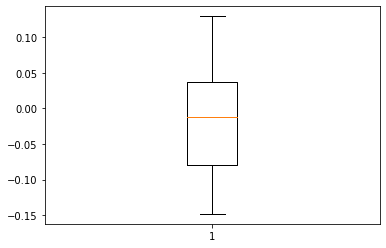

2.   30.87533606854064


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


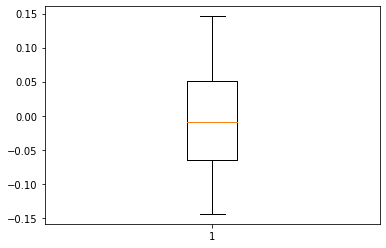

3.   21.924753040728753


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


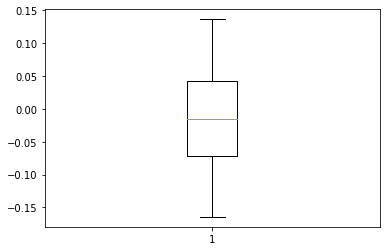

4.   13.460162912040106


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


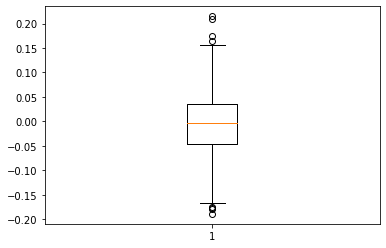

5.   11.280725781572185


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


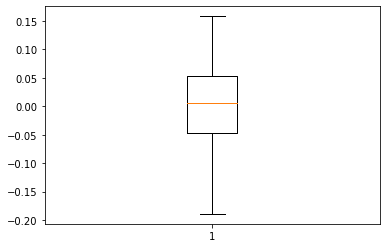

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


6.   7.0145746168324


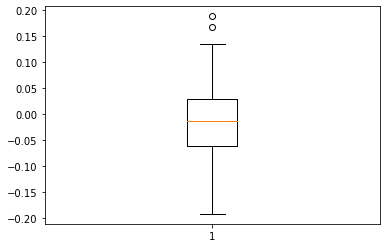

7.   5.5558353513502166


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


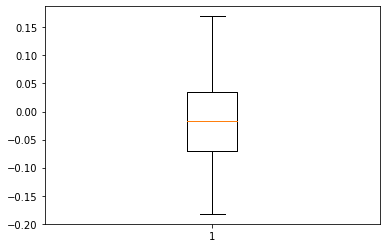

8.   4.976268162033466


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


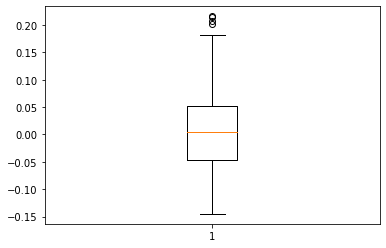

9.   4.55753518813652


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


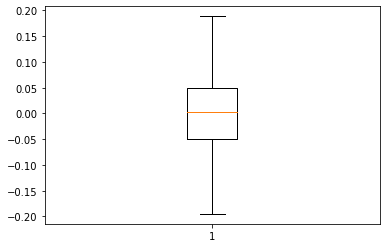

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


10.   4.208167130127297


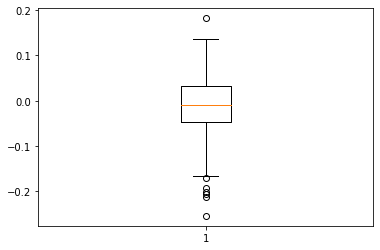

11.   3.3430570795771977


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


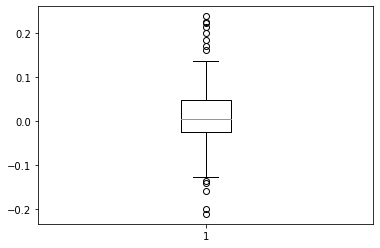

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


12.   3.072068355226004


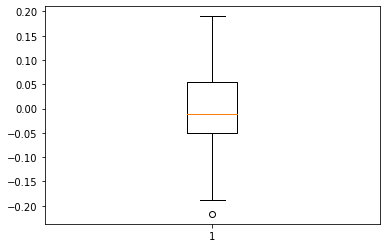

13.   2.831340792736536


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


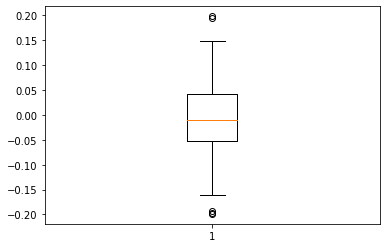

14.   2.373152636156129


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


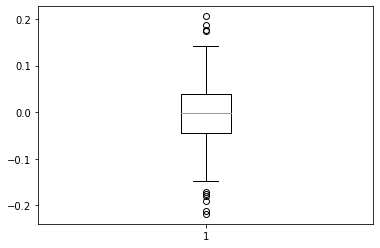

15.   2.1700206154180415


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


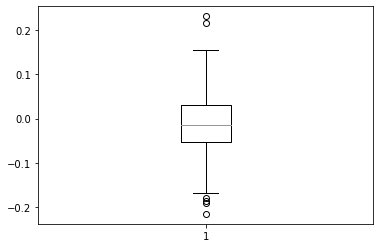

16.   1.9480755237151774


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


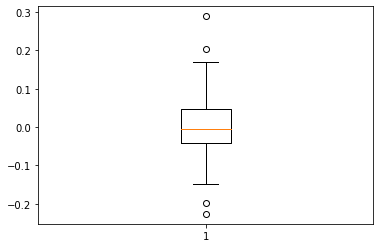

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


17.   1.8276094244213978


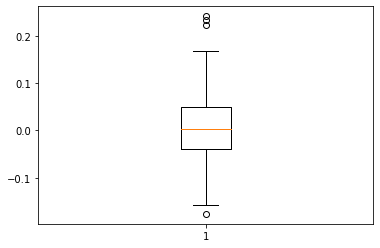

18.   1.7990554803040943


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


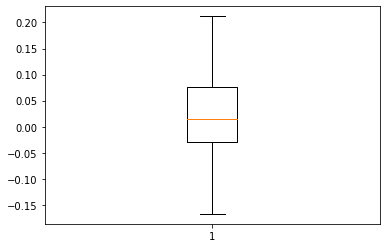

19.   1.612926016633435


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


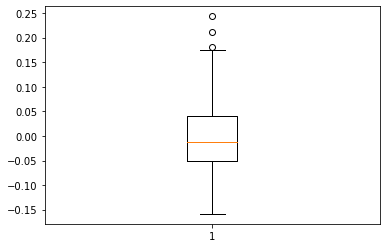

20.   1.5620251545756947


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


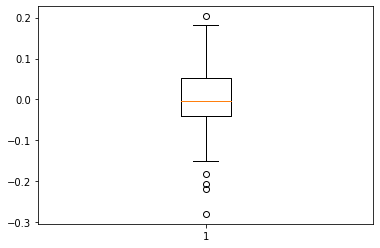

21.   1.373134800451301


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


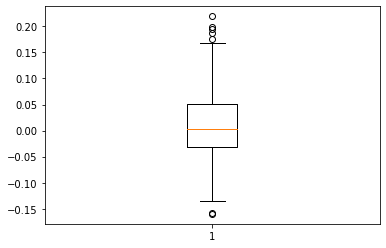

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


22.   1.3319153289858014


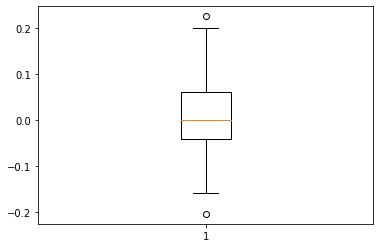

23.   1.1978594217515683


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


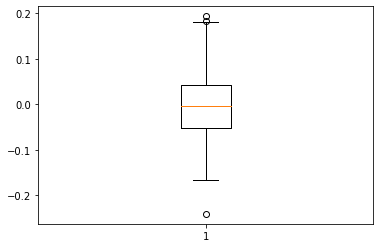

24.   1.0106029872261493


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


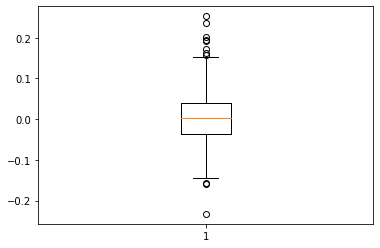

25.   0.9800363099455341


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


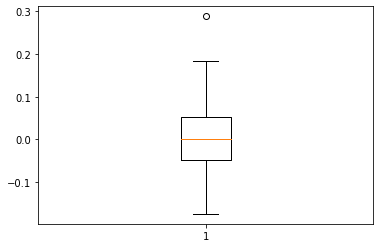

26.   0.9442451700046612


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


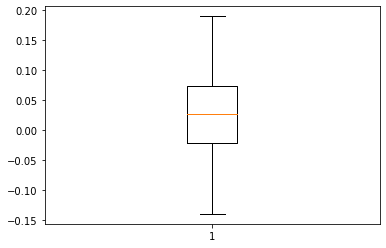

27.   0.8739874222537145


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


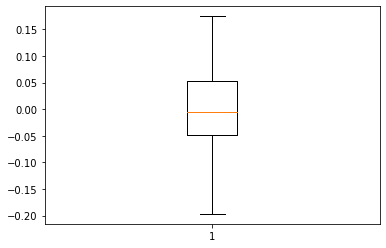

28.   0.8276823090181158


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


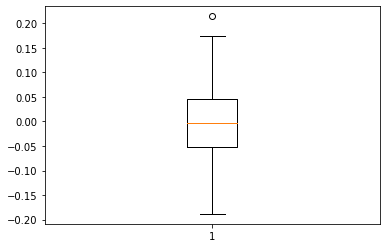

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


29.   0.7812838437266075


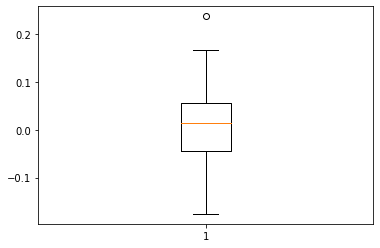

30.   0.7296438687157749


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


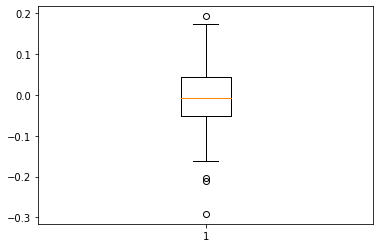

In [6]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i],i) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
index=0
limit =29
for i in eig_pairs:
    print(str(index + 1) + ".   " + str(i[0]))
    plt.boxplot(i[1])
    plt.show()
    if index == limit:
        break
    index = index +1

##### Eigenvalues ordered in Ascending order

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Eigenvalues in Ascending order:
1.   5.5507878206079914e-17


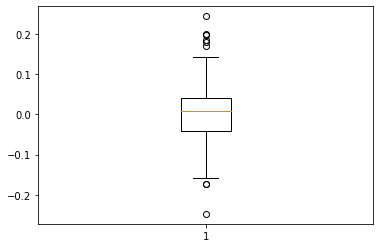

2.   1.5958665343018234e-16


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


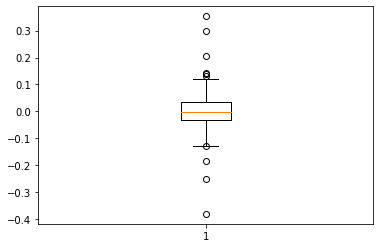

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


3.   2.850479752437843e-16


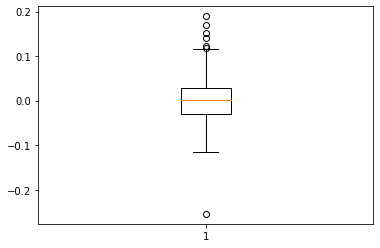

4.   2.850479752437843e-16


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


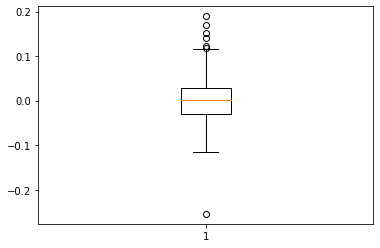

5.   3.9652091396593427e-16


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


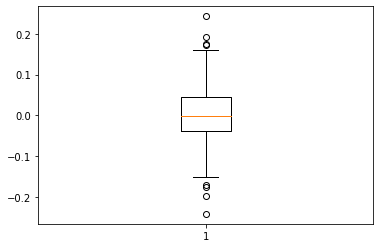

6.   6.129611721309015e-16


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


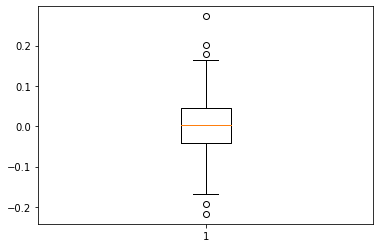

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


7.   8.654489974654953e-16


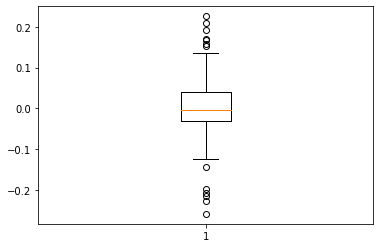

8.   8.654489974654953e-16


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


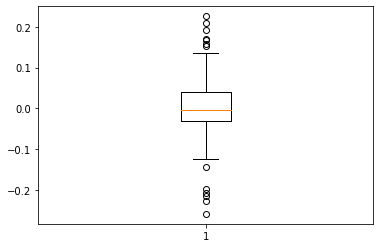

9.   4.692528030250663e-06


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


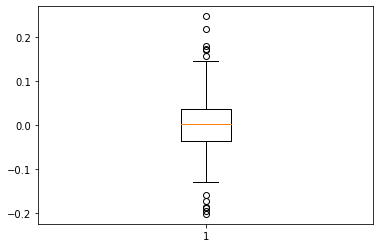

10.   8.429536564598877e-06


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


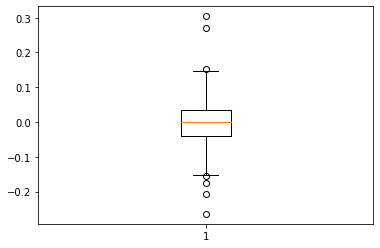

In [7]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i],i) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0])

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in Ascending order:')
index=0
limit =9
for i in eig_pairs:
    print(str(index + 1) + ".   " + str(i[0]))
    plt.boxplot(i[1])
    plt.show()
    if index == limit:
        break
    index = index +1
#     plt.boxplot(i[1])
#     plt.show()

In [8]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
print("1. Variance Explained\n",var_exp)
cum_var_exp = np.cumsum(var_exp)
print("\n\n2. Cumulative Variance Explained\n",cum_var_exp)
print("\n\n3. Percentage of variance - First two principal components each contain\n ",var_exp[0:2])
print("\n\n4. Percentage of variance - First two principal components together contain\n",sum(var_exp[0:2]))
print("\n\n4. Percentage of variance - First 30 principal components together contain\n",sum(var_exp[0:30]))

1. Variance Explained
 [(19.779098594689582+0j), (16.506907611582342+0j), (11.72164967036016+0j), (7.196218532898224+0j), (6.031024175887083+0j), (3.7502080909358+0j), (2.9703210564676423+0j), (2.66046654905375+0j), (2.436598977258062+0j), (2.2498160304038497+0j), (1.787301496259807+0j), (1.6424225603118514+0j), (1.513722175488384+0j), (1.2687606452687878+0j), (1.1601599974302+0j), (1.0415013011993182+0j), (0.9770964064005775+0j), (0.9618305865745427+0j), (0.8623200305182644+0j), (0.8351068586366108+0j), (0.7341202453304835+0j), (0.7120830436699473+0j), (0.6404126181047+0j), (0.5402995486461653+0j), (0.5239576595491824+0j), (0.5048226114640157+0j), (0.4672606510517238+0j), (0.44250450833550903+0j), (0.4176984567289479+0j), (0.3900901322502785+0j), (0.36032542456336236+0j), (0.35060660346110223+0j), (0.3305939288335744+0j), (0.3258577492672683+0j), (0.29332990253371705+0j), (0.2822527751535337+0j), (0.27709294102765697+0j), (0.2562821061037272+0j), (0.24558124969576955+0j), (0.233849335

##### Cumulative variance graph

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\transforms.py:796: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


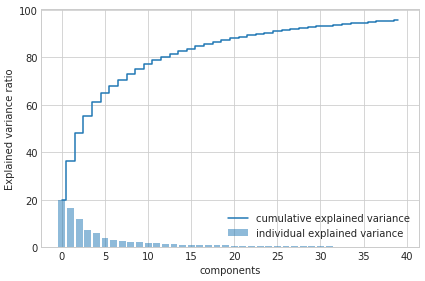

In [9]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(40), var_exp[:40], alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(40), cum_var_exp[:40], where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('components')
    plt.legend(loc='best')
    plt.tight_layout()